# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        

        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | mirny
Processing Record 3 of Set 1 | camana
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | miri
Processing Record 6 of Set 1 | espargos
City not found. Skipping...
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | bridgewater
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | fort mcmurray
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | ulladulla
Processing Record 21 of Set 1 | badger
Processing Record 22 of S

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,20.05,90,100,3.60,US,1723150292
1,mirny,62.5353,113.9611,14.68,68,11,1.49,RU,1723150293
2,camana,-16.6228,-72.7111,16.25,81,63,4.76,PE,1723150294
3,tiksi,71.6872,128.8694,5.83,90,100,5.21,RU,1723150296
4,miri,4.4148,114.0089,25.08,94,40,2.57,MY,1723150297


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,20.05,90,100,3.60,US,1723150292
1,mirny,62.5353,113.9611,14.68,68,11,1.49,RU,1723150293
2,camana,-16.6228,-72.7111,16.25,81,63,4.76,PE,1723150294
3,tiksi,71.6872,128.8694,5.83,90,100,5.21,RU,1723150296
4,miri,4.4148,114.0089,25.08,94,40,2.57,MY,1723150297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

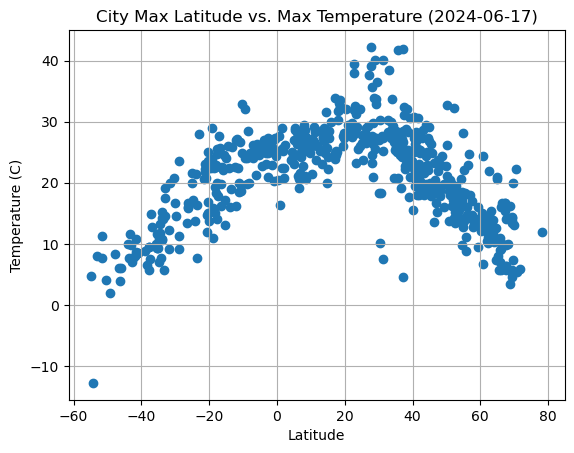

In [13]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

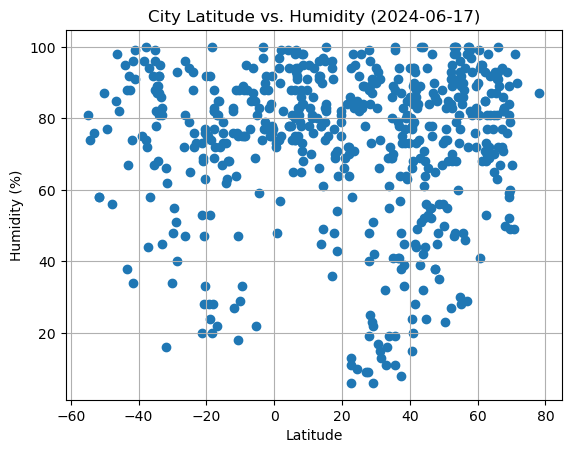

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

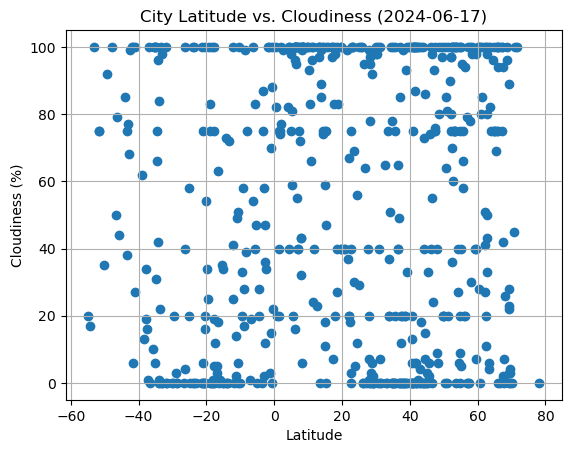

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

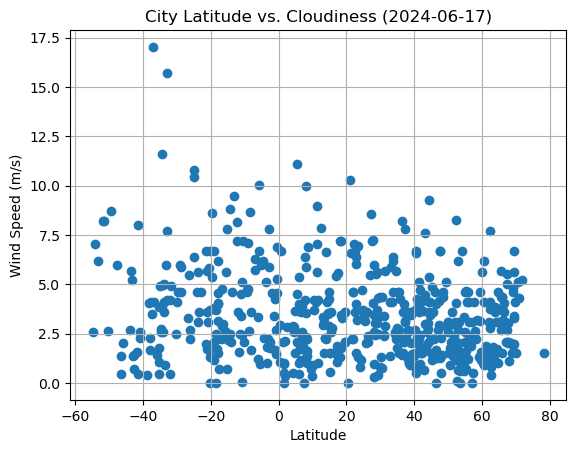

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"The r^2-value is: {rvalue**2}")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,20.05,90,100,3.60,US,1723150292
1,mirny,62.5353,113.9611,14.68,68,11,1.49,RU,1723150293
3,tiksi,71.6872,128.8694,5.83,90,100,5.21,RU,1723150296
4,miri,4.4148,114.0089,25.08,94,40,2.57,MY,1723150297
12,bridgewater,44.3835,-64.5155,25.06,64,15,4.12,CA,1723150308


In [46]:

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,camana,-16.6228,-72.7111,16.25,81,63,4.76,PE,1723150294
5,puerto natales,-51.7236,-72.4875,11.25,58,75,8.23,CL,1723150299
6,adamstown,-25.0660,-130.1015,21.57,79,58,10.44,PN,1723150301
7,port-aux-francais,-49.3500,70.2167,1.97,77,92,8.73,TF,1723150302
8,chonchi,-42.6128,-73.8092,7.67,88,99,0.73,CL,1723150303


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.44985980712783913


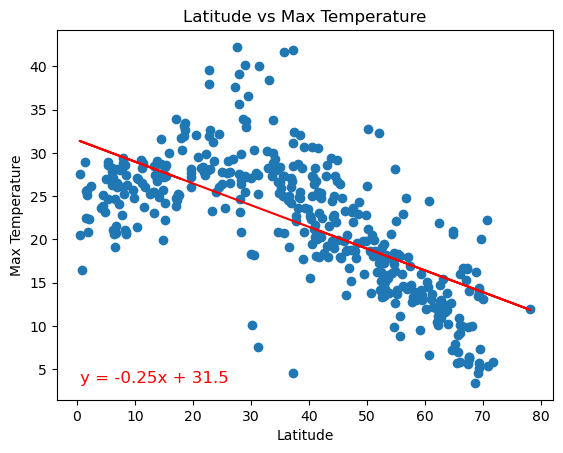

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

   
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperature")

print (f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.7165367599157049


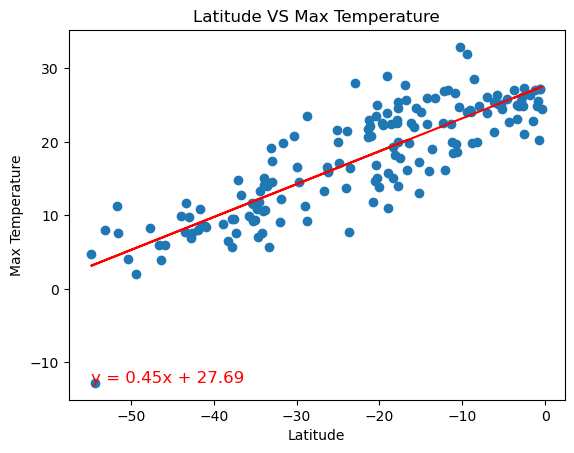

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude VS Max Temperature")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** After looking at the data on these charts, we are able to see that the Northern Hemisphere shows a negative regression while the Southern Hemisphere shows a positive regression slope. We can see that at a higher latitude, the Northern Hemisphere the temperature will likely drop and the Souther Hemisphere the temperature will likely rise.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0002427973205534048


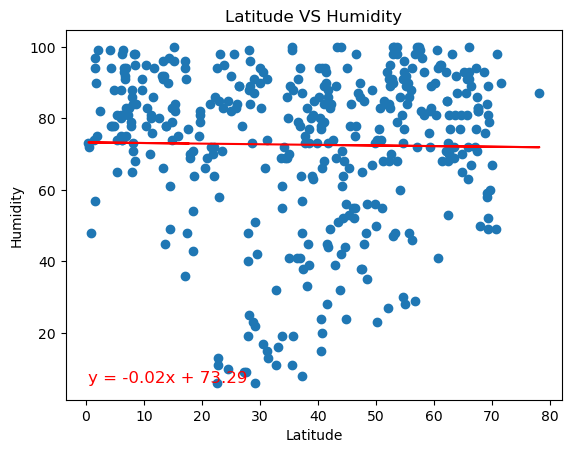

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.0009964031961959897


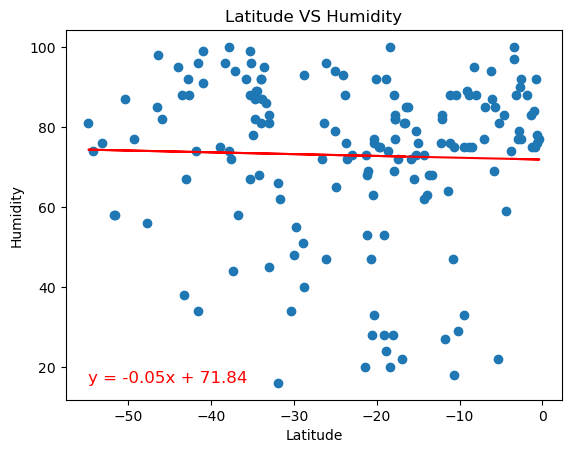

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:With the data pulled for these charts, the information shows that there is a very slight difference in the humidity between the Northern and Southern Hemisphere depending on the Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017346491778863753


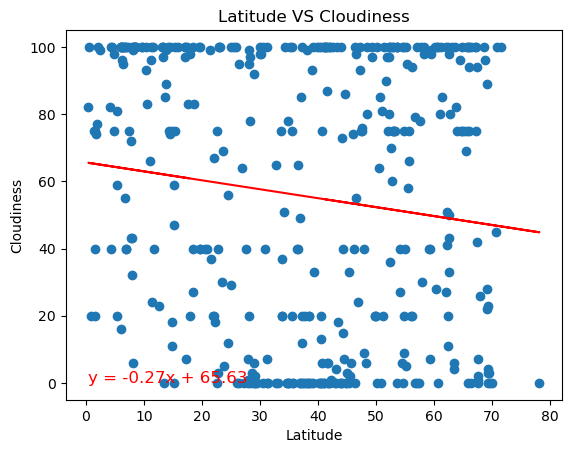

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.023162398003526923


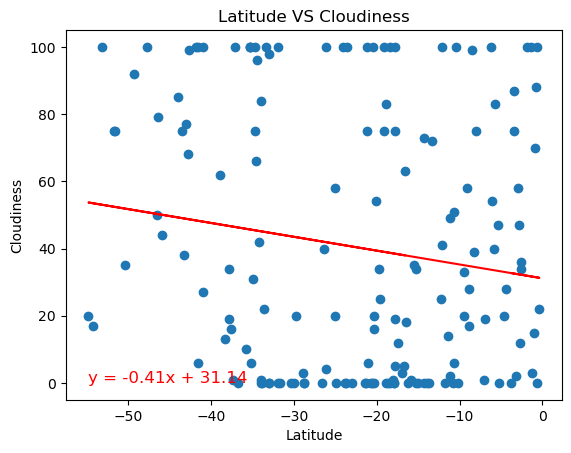

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Both charts show that dependant on the data, there is a slight negative correlation in both the Northern and Southern Hemisphere between the cloudiness and latitude of the hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004057348956107944


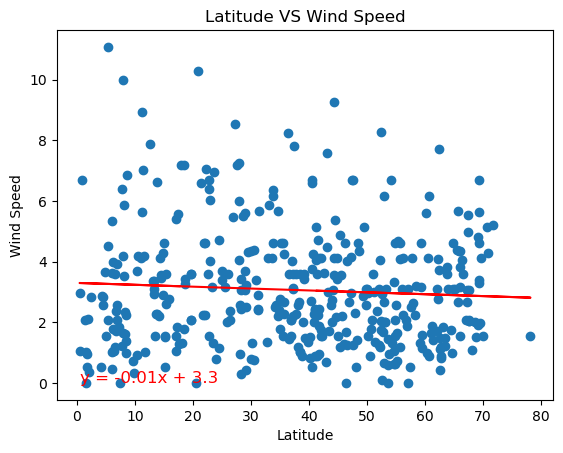

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.004057348956107944


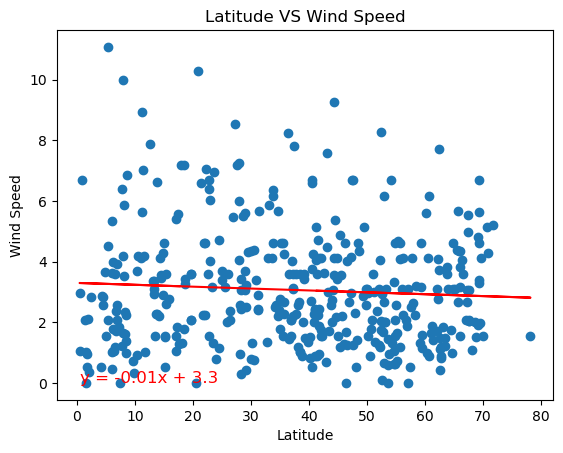

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Both charts show that dependant on the data, there is a slight negative correlation in both the Northern and Southern Hemisphere between the wind speed and latitude of the hemisphere.